# Part 1

### Numpy version

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

# 1. Generate the Signal
# Parameters for the signal
N = 600 # Number of sample points
SAMPLE_RATE = 800.0 # Sampling rate in Hz
FREQUENCY = 50.0 # Frequency of the sine wave in Hz
# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.288466 seconds
NumPy FFT Execution Time: 0.000280 seconds
FFT is approximately 1030.59 times faster.


### Torch Version

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

def torch_dft(x, device):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)

    # Convert to tensor
    x = torch.tensor(x, dtype=torch.complex64, device=device)
    n = torch.arange(N, device=device, dtype=torch.float32)
    k = n.view(N, 1) 
    # Build DFT matrix and multiply (O(N^2))
    W = torch.exp(-2j * torch.pi * (k @ n.view(1, N)) / N).to(torch.complex64)
    X = W @ x
    return X.detach().cpu().numpy()

# 1. Generate the Signal
# Parameters for the signal
N = 600 # Number of sample points
SAMPLE_RATE = 800.0 # Sampling rate in Hz
FREQUENCY = 50.0 # Frequency of the sine wave in Hz
# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# Time torch DFT implementation
start_time_fft = time.time()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fft_result = torch_dft(y, device)
end_time_fft = time.time()
torch_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
print(f"Torch DFT Execution Time: {torch_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")
if torch_duration > 0:
    print(f"Torch DFT is approximately {naive_duration / torch_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

### Larger sample size

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

def torch_dft(x, device):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)

    # Convert to tensor
    x = torch.tensor(x, dtype=torch.complex64, device=device)
    n = torch.arange(N, device=device, dtype=torch.float32)
    k = n.view(N, 1) 
    # Build DFT matrix and multiply (O(N^2))
    W = torch.exp(-2j * torch.pi * (k @ n.view(1, N)) / N).to(torch.complex64)
    X = W @ x
    return X.detach().cpu().numpy()

# 1. Generate the Signal
# Parameters for the signal
N = 1600 # Number of sample points
SAMPLE_RATE = 800.0 # Sampling rate in Hz
FREQUENCY = 50.0 # Frequency of the sine wave in Hz
# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# Time torch DFT implementation
start_time_fft = time.time()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fft_result = torch_dft(y, device)
end_time_fft = time.time()
torch_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
print(f"Torch DFT Execution Time: {torch_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")
if torch_duration > 0:
    print(f"Torch DFT is approximately {naive_duration / torch_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.294316 seconds
NumPy FFT Execution Time: 0.001244 seconds
Torch DFT Execution Time: 0.005203 seconds
FFT is approximately 236.58 times faster.
Torch DFT is approximately 56.57 times faster.


### Smaller sample size

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

def torch_dft(x, device):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)

    # Convert to tensor
    x = torch.tensor(x, dtype=torch.complex64, device=device)
    n = torch.arange(N, device=device, dtype=torch.float32)
    k = n.view(N, 1) 
    # Build DFT matrix and multiply (O(N^2))
    W = torch.exp(-2j * torch.pi * (k @ n.view(1, N)) / N).to(torch.complex64)
    X = W @ x
    return X.detach().cpu().numpy()

# 1. Generate the Signal
# Parameters for the signal
N = 10 # Number of sample points
SAMPLE_RATE = 800 # Sampling rate in Hz
FREQUENCY = 50.0 # Frequency of the sine wave in Hz
# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# Time torch DFT implementation
start_time_fft = time.time()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fft_result = torch_dft(y, device)
end_time_fft = time.time()
torch_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
print(f"Torch DFT Execution Time: {torch_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")
if torch_duration > 0:
    print(f"Torch DFT is approximately {naive_duration / torch_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.000669 seconds
NumPy FFT Execution Time: 0.004445 seconds
Torch DFT Execution Time: 0.027652 seconds
FFT is approximately 0.15 times faster.
Torch DFT is approximately 0.02 times faster.


# Part 2

### Numpy version

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the meaningful parameters of the faces dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# It is important in machine learning to split the data accordingly into training and testing sets to
# avoid contamination of the model. Ideally, you should also have a validation set.

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [19]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


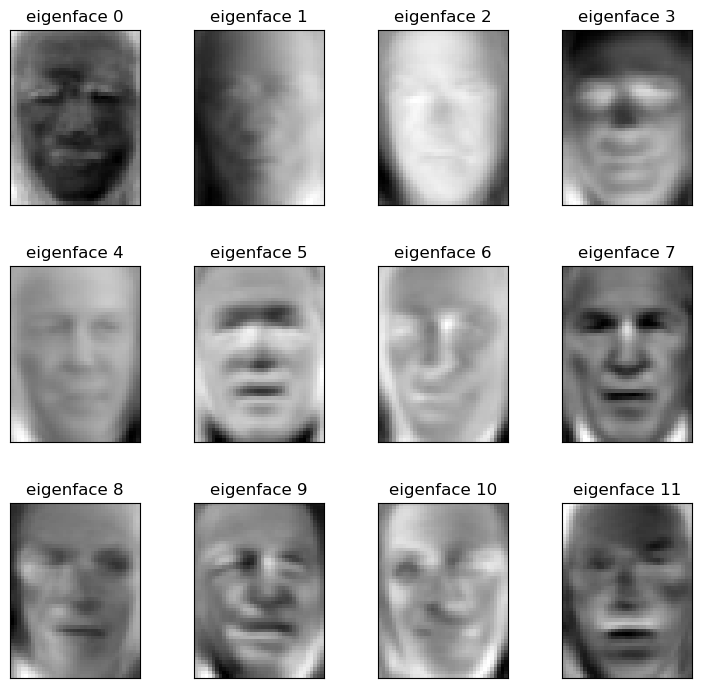

In [21]:
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

(966,)


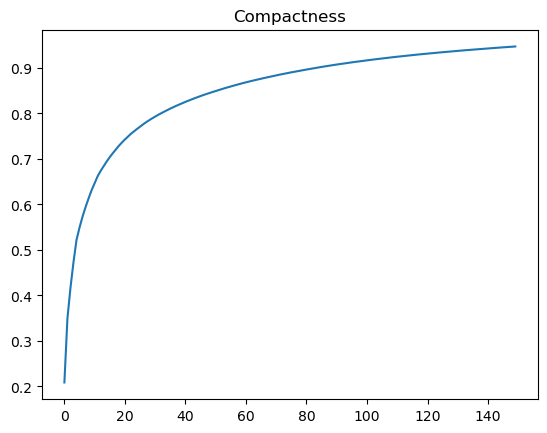

In [10]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]

predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)

print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 4 3 3 3 3 6 3 3 4 1 1 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 3 3 1 1 3 6 3 5 1 4 1 3 6 6 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 1 3 6 3 3 1 3 1 1 2 6 3 3 3 3 3 3 3 3 3 1 3
 3 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 1 3 3 3 3 1 3 3 1 3
 6 1 1 3 1 3 3 3 6 1 3 3 6 5 5 1 3 3 5 1 3 3 3 3 3 1 5 3 3 3 3 5 3 3 1 1 3
 3 3 3 3 2 4 3 2 3 4 3 3 3 3 3 3 3 3 1 5 1 4 2 4 3 1 3 3 3 3 3 3 1 3 3 3 6
 3 1 1 3 3 3 2 3 3 3 3 3 3 1 6 3 3 3 3 4 2 3 3 3 3 3 3 4 3 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 6 3 3 3 6 3 3 1 3 3 3 3 3 3 3 1 3 1 3 3 1 3 3 4 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

### PyTorch version

In [26]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the meaningful parameters of the faces dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# It is important in machine learning to split the data accordingly into training and testing sets to
# avoid contamination of the model. Ideally, you should also have a validation set.

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [31]:
# Center data
mean = torch.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

#Eigen-decomposition
U, S, V = torch.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

#project into PCA subspace
X_transformed = torch.matmul(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = torch.matmul(X_test, components.T)
print(X_test_transformed.shape)

torch.Size([966, 150])
torch.Size([322, 150])


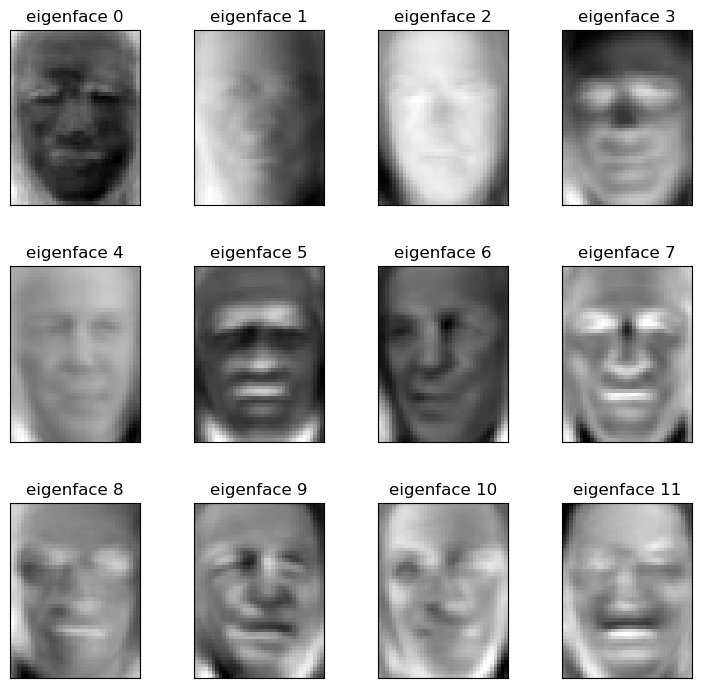

In [32]:
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

torch.Size([966])


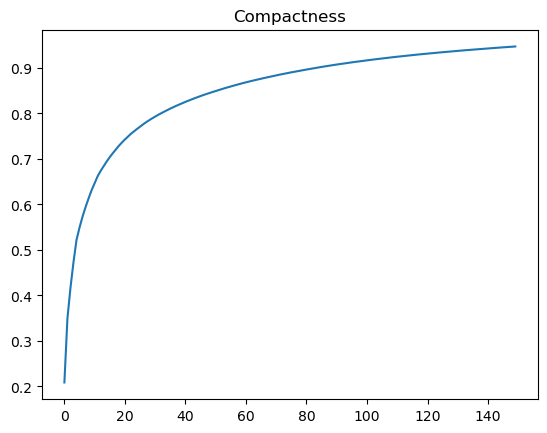

In [34]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = torch.cumsum(explained_variance_ratio, dim=0)
print(ratio_cumsum.shape)
eigenvalueCount = torch.arange(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]

predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",torch.sum(correct))
print("Accuracy:",torch.sum(correct)/total_test)

print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 4 3 3 4 1 1 3 3 1 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 1 1 3 4 3 5 3 4 1 2 6 4 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 3 6 3 1 1 3 1 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 3 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 4 3 3 3 3 1 3 3 3 3
 1 1 1 3 3 3 3 3 3 3 3 3 3 5 5 1 3 3 5 1 3 3 1 3 3 1 5 3 3 3 3 5 3 3 3 1 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 3 3 3 3 2 3 1 4 2 4 3 1 5 3 3 3 3 3 1 3 3 3 6
 3 1 2 3 3 3 2 3 3 3 3 3 3 1 1 3 3 3 3 4 3 3 3 3 3 3 3 5 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 6 1 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 3 3 5 3 3 1
 3 6 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 1 3 3 4 3]
Which Correct: tensor([ True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True, False,  True,  True, False,  True,  True,  True,
         True, False,  True, False, False, False, False,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  Tr

/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ryu/miniconda3/envs/COMP3710A2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

# Part 3

### Part 3.1 CNN Classifier

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
from torch import optim
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the meaningful parameters of the faces dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data.reshape(-1, h, w)

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# It is important in machine learning to split the data accordingly into training and testing sets to
# avoid contamination of the model. Ideally, you should also have a validation set.

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# (N, H, W) -> (N, 1, H, W)
X_train = X_train.unsqueeze(1)
X_test  = X_test.unsqueeze(1)

# Create TensorDataset for training and testing
batch_size = 5
train_ds = TensorDataset(X_train, y_train)
test_ds  = TensorDataset(X_test,  y_test)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=True)

In [13]:
class CNN(nn.Module):
   def __init__(self, in_channels, num_classes):

       """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image.
           * num_classes: Number of classes to predict.
       """
       super(CNN, self).__init__()

       # 1st convolutional layer
       self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, padding=1)
       # Max pooling layer
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # 2nd convolutional layer
       self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
       # Fully connected layer
       self.fc1 = nn.Linear(32 * 7 * 7, num_classes)
       # Adaptive Average Pooling（7×7）
       self.gap = nn.AdaptiveAvgPool2d((7, 7))

   def forward(self, x):
       """
       Define the forward pass of the neural network.

       Parameters:
           x: Input tensor.

       Returns:
           torch.Tensor
               The output tensor after passing through the network.
       """
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = self.gap(x)            # Apply global average pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=n_classes).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=7, bias=True)
  (gap): AdaptiveAvgPool2d(output_size=(7, 7))
)


In [15]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for data, targets in train_loader:
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]
Epoch [2/10]
Epoch [3/10]
Epoch [4/10]
Epoch [5/10]
Epoch [6/10]
Epoch [7/10]
Epoch [8/10]
Epoch [9/10]
Epoch [10/10]


In [17]:
model.eval()
correct = total = 0
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)
        logits = model(data)
        preds = logits.argmax(dim=1)
        correct += (preds == targets).sum().item()
        total += targets.size(0)
        
        # Collect predictions and targets for classification report
        all_predictions.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

print(f"Test Accuracy: {correct/total:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(all_targets, all_predictions, target_names=target_names))

Test Accuracy: 0.764

Detailed Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.69      0.69        13
     Colin Powell       0.81      0.85      0.83        60
  Donald Rumsfeld       0.62      0.59      0.60        27
    George W Bush       0.77      0.96      0.86       146
Gerhard Schroeder       0.58      0.28      0.38        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.94      0.42      0.58        36

         accuracy                           0.76       322
        macro avg       0.73      0.62      0.65       322
     weighted avg       0.77      0.76      0.74       322



### Part 3.3 DAWNBench Challenge 